## 일원분산분석 개요
- 목적 : 셋 이상의 그룹 간 차이가 준재하는지를 확인하기 위한 가설 검정 방법
- 귀무가설과 대립가설
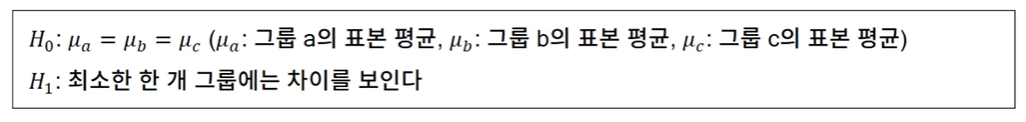

## 독립 표본 t-검정을 사용하면 안되는 이유
- 일원분산분석은 독립 표본 t-검정을 여러번 사용한 것과 같은 결과를 낼 것 처럼 보임
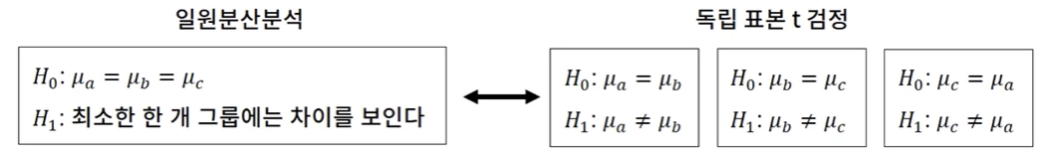
- 독립 표본 t-검정에서 하나 이상의 귀무가설이 기각되면, 자연스레 일원분산분석의 귀무가설 역시 기각되므로, 기각된 원인까지 알 수 있으므로 일원분산분석이 필요하지 않아 보일 수 있음
- 그러나 독립 표본 t-검정을 여러 번 했을 때, 아무리 높은 p-value가 나오더라도 그 신뢰성에 문제가 생길 수 있어, 일원분산분석이 필요하다.
  - 각 가설의 p-value가 0.95이고, 그룹의 개수가 k일 때 모든 귀무가설이 참일 확률 : (0.95)^k
  - 그룹의 개수가 3개만 되어도 그 확률이 0.857로 크게 감소하여, 그룹의 개수가 14개가 되면 그 확률이 0.5 미만으로 떨어진다.

## 일원분산분석의 선행 조건
- 독립성 : 모든 그룹은 서로 독립적이어야 한다.
- 정규성 : 모든 그룹의 데이터는 정규분포를 따라야 한다.
  - 그렇지 않으면 비모수적인 방법인 Kruskal-Wallis H Test를 수행해야 한다.
- 등분산성 : 모든 그룹에 데이터에 대한 분산이 같아야 한다.
  - 그렇지 않으면 비모수적인 방법인 Kruskal-Wallis H Test를 수행해야 한다.

## 통계량
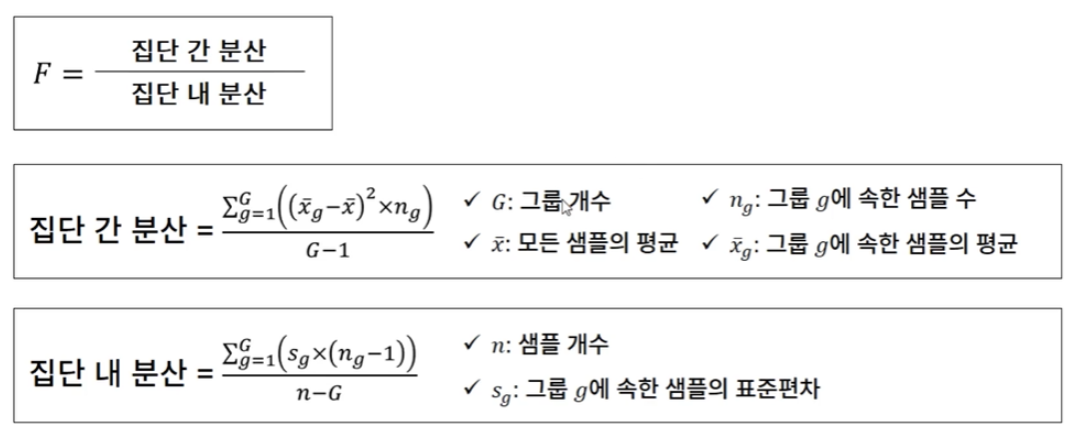

## 사후분석 : Tukey HSD test
- Tukey HSD (honestly significant difference) test는 일원분산분석에서 두 그룹 a와 b간 차이가 유의한 지 파악하는 사후 분석 방법이다.
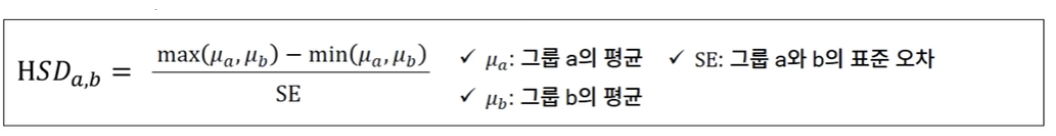
- 만약, HSD가 유의 수준보다 크면 두 차이가 유의하다고 간주

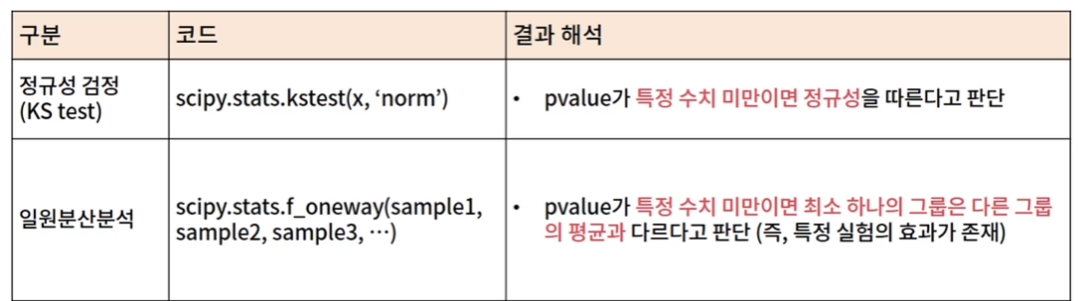

- 사후분석 : statsmodels.stats.multicomp.pairwise_tukeyhsd(Data, Group)
  - 각 그룹간 reject결과 확인. Reject 컬럼이 True면 두 그룹간 차이가 유의하다고 할 수 있음

In [1]:
import pandas as pd
import os
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

In [2]:
# 데이터 불러오기 및 확인
df = pd.read_csv('지점별_일별판매량.csv', engine = 'python')
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [3]:
# 데이터 분할 (결측이 포함되어 있을 수 있으므로 dropna를 사용)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

In [5]:
A

array([124, 147, 129, 123, 147, 149, 140, 142, 124, 166, 127, 130, 139,
       121, 149, 155, 140, 150, 137, 144, 136, 126, 150, 142, 149, 127,
       140, 138, 128, 117], dtype=int64)

([<matplotlib.axis.XTick at 0x1dc2bac1970>,
 [Text(0, 0, '지점 A'), Text(0, 0, '지점 B'), Text(0, 0, '지점 C')])

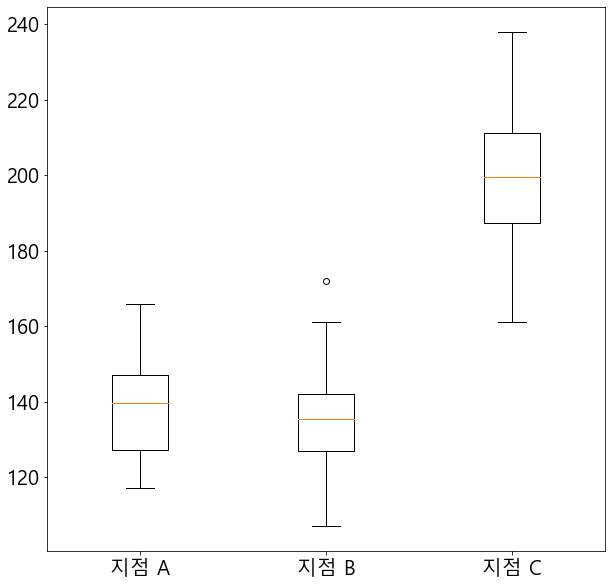

In [6]:
# 박스플롯으로 시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 10)
plt.boxplot([A,B,C])
plt.xticks([1, 2, 3], ['지점 A', '지점 B', '지점 C'])

In [7]:
# 정규성 검정: 세 변수 모두 정규 분포를 띔을 확인
from scipy.stats import *
print(kstest(A, 'norm'))
print(kstest(B, 'norm'))
print(kstest(C, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [8]:
# 일원분산분석 수행: p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재
print(f_oneway(A, B, C))

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)


In [12]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)
Data = A.tolist() + B.tolist() + C.tolist()

print(pairwise_tukeyhsd(Data, Group))

# 결론: [A, B] / [C]로 데이터가 구분됨
# A ~ B는 유의한 차이가 존재하지 않음
# A ~ C는 유의한 차이 존재
# B ~ C는 유의한 차이 존재 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B     -1.4   0.9 -10.5745  7.7745  False
     A      C  62.2333 0.001  53.0589 71.4078   True
     B      C  63.6333 0.001  54.4589 72.8078   True
----------------------------------------------------
